# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [14]:
import numpy
import matplotlib.pyplot as plt
i = 0
for i in range(0,13): 
    i = i + 1
    if 12 % i == 0:
        print(i)

# Größe der Tabelle (z.B., 10x10)
n = 10
for i in range(1, 11):
    for j in range(1, 11):
        # Multiplikation
        result = i * j

        # Ausgabe mit führender Null für Zahlen unter 10
        if result < 10:
            print(f"0{result}", end=" ")
        else:
            print(result, end=" ")

    # Neue Zeile für jede i-Iteration
    print()


1
2
3
4
6
12
01 02 03 04 05 06 07 08 09 10 
02 04 06 08 10 12 14 16 18 20 
03 06 09 12 15 18 21 24 27 30 
04 08 12 16 20 24 28 32 36 40 
05 10 15 20 25 30 35 40 45 50 
06 12 18 24 30 36 42 48 54 60 
07 14 21 28 35 42 49 56 63 70 
08 16 24 32 40 48 56 64 72 80 
09 18 27 36 45 54 63 72 81 90 
10 20 30 40 50 60 70 80 90 100 
  1  2  3  4  5  6  7  8  9 10
  2  4  6  8 10 12 14 16 18 20
  3  6  9 12 15 18 21 24 27 30
  4  8 12 16 20 24 28 32 36 40
  5 10 15 20 25 30 35 40 45 50
  6 12 18 24 30 36 42 48 54 60
  7 14 21 28 35 42 49 56 63 70
  8 16 24 32 40 48 56 64 72 80
  9 18 27 36 45 54 63 72 81 90
 10 20 30 40 50 60 70 80 90 100


---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

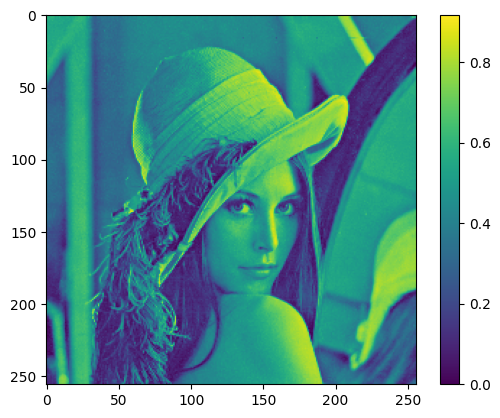

9


In [8]:
img = plt.imread('data/lena.png')
plt.imshow(img)
plt.colorbar() 
plt.show()

s = 0
for x in range(1,10):
    s =+ x
print(s)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [50]:
def prewitt_v(img):
    gy = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [-1,-1,-1],
        [0,0,0],
        [1,1,1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/6
        gy[p[0]+n,p[1]+n] = neighborhood_mean
    return gy

def prewitt_h(img):
    gx = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [-1,0,1],
        [-1,0,1],
        [-1,0,1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/6
        gx[p[0]+n,p[1]+n] = neighborhood_mean
    return gx
    

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

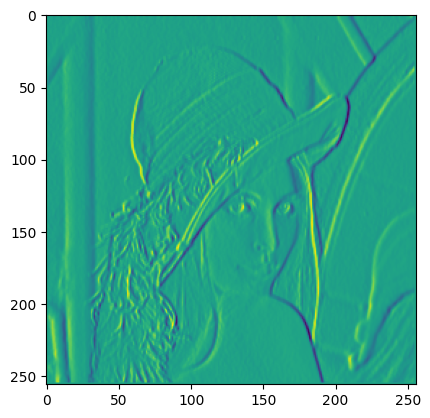

In [51]:
prewittv = plt.imshow(prewitt_v(img))
prewitth = plt.imshow(prewitt_h(img))

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

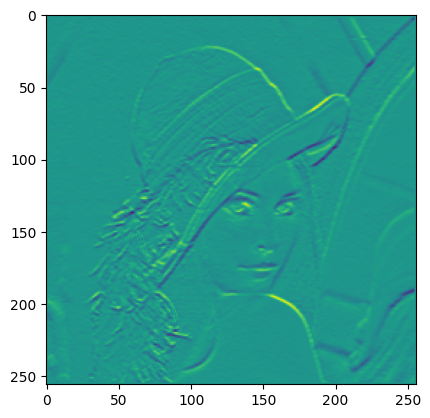

In [53]:
import skimage.io

lena_prewitt_h = skimage.io.imread('data/lena_prewitt_h.tiff')
lena_prewitt_v = skimage.io.imread('data/lena_prewitt_v.tiff')

assert numpy.allclose(prewitt_h(img), lena_prewitt_h, atol=1/255)
assert numpy.allclose(prewitt_v(img), lena_prewitt_v, atol=1/255)

plt.imshow(lena_prewitt_h)
plt.imshow(lena_prewitt_v)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

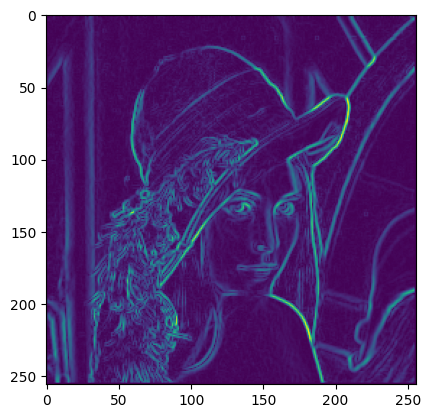

In [54]:
magnitude_lena = numpy.sqrt(prewitt_h(img)**2 + prewitt_v(img)**2)
plt.imshow(magnitude_lena)

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

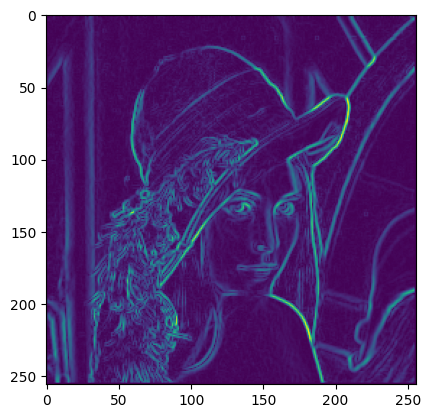

In [55]:
import skimage.io
lena_prewitt_gm = skimage.io.imread('data/lena_prewitt_gradmag.tiff')
assert numpy.allclose(magnitude_lena, lena_prewitt_gm, atol=1/255)
plt.imshow(lena_prewitt_gm)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [56]:
def sobel_v(img):
    gys = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/8
        gys[p[0]+n,p[1]+n] = neighborhood_mean
    return gys

def sobel_h(img):
    gxs = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/8
        gxs[p[0]+n,p[1]+n] = neighborhood_mean
    return gxs

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

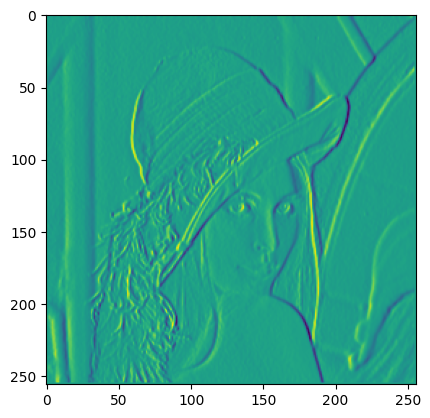

In [57]:
sobelv = plt.imshow(sobel_v(img))
sobelh = plt.imshow(sobel_h(img))

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

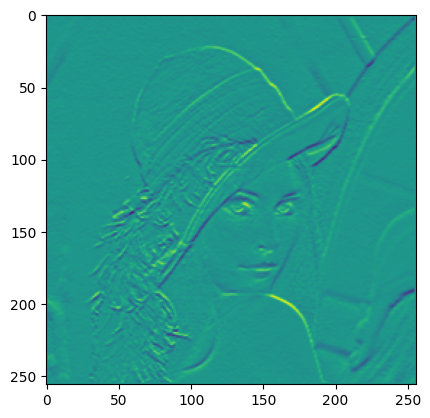

In [58]:
import skimage.io

lena_sobel_h = skimage.io.imread('data/lena_sobel_h.tiff')
lena_sobel_v = skimage.io.imread('data/lena_sobel_v.tiff')

assert numpy.allclose(sobel_h(img), lena_sobel_h, atol=1/255)
assert numpy.allclose(sobel_h(img), lena_sobel_h, atol=1/255)

plt.imshow(lena_sobel_h)
plt.imshow(lena_sobel_v)